In [1]:
# loads resnetv1 and tinkers with various attributes and methods to test out the tensorflow library
# this model does not contribute anything to the project; it was just used as a playground to learn more about the models and libraries

import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import glob
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

TRAIN_DIR = 'data/train/*'
TEST_DIR = 'data/test/*'
IMG_SIZE = 300
IMG_DIM = (IMG_SIZE, IMG_SIZE)
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, 'resnet')

In [2]:
def label_img(img):
    word_label = img.split('.')[-3]
    return word_label

In [3]:
train_files = glob.glob(TRAIN_DIR) 
train_imgs = []
for index, item in tqdm(enumerate(train_files)):
    if index < 10000:
        train_imgs.append(img_to_array(load_img(item, target_size=IMG_DIM)))
    else:
        pass
    
validation_imgs = []
for index, item in tqdm(enumerate(train_files)):
    if index > 12000 and index < 15000:
        validation_imgs.append(img_to_array(load_img(item, target_size=IMG_DIM)))
    else:
        pass

25000it [00:13, 1861.55it/s]
25000it [00:05, 4556.96it/s]  


In [4]:
train_imgs = np.array(train_imgs)
validation_imgs = np.array(validation_imgs)

In [5]:
train_labels = []
for index, item in tqdm(enumerate(train_files)):
    if index < 10000:
        train_labels.append(item.split('/')[-1].split('.')[0].strip())
    else:
        pass
    
validation_labels = []
for index, item in tqdm(enumerate(train_files)):
    if index > 12000 and index < 15000:
        validation_labels.append(item.split('/')[-1].split('.')[0].strip())
    else:
        pass

25000it [00:00, 2431875.32it/s]
25000it [00:00, 5013991.30it/s]


In [6]:
train_imgs_scaled = train_imgs.astype('float32')
train_imgs_scaled /= 255

validation_imgs_scaled = validation_imgs.astype('float32')
validation_imgs_scaled /= 255

(300, 300, 3)
dog
(300, 300, 3)
cat


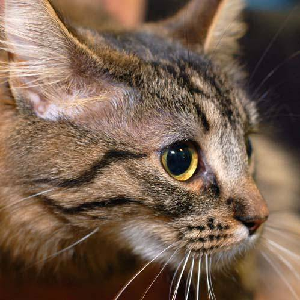

In [7]:
print(train_imgs[255].shape)
print(train_labels[255])

print(validation_imgs[255].shape)
print(validation_labels[255])

array_to_img(validation_imgs[255])

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)

train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
 horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc,batch_size=64)
val_generator = validation_datagen.flow(validation_imgs, validation_labels_enc, batch_size=64)

In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = keras.models.load_model('models/resnetworkplease')

model.summary()

Metal device set to: Apple M2


2022-08-19 11:27:08.093078: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-19 11:27:08.093950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 204800)            23587712  
                                                                 
 dense (Dense)               (None, 512)               104858112 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 128,708,993
Trainable params: 105,121,281


In [22]:
history = model.fit(train_generator, epochs=1, validation_data=val_generator, validation_steps=50, verbose=1)

157/157 [==============================] - ETA: 0s - loss: 0.6167 - accuracy: 0.6561

2022-08-19 11:30:50.112144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 209s 1s/step - loss: 0.6167 - accuracy: 0.6561 - val_loss: 0.5694 - val_accuracy: 0.7179


In [23]:
print(model.layers[0].input_shape)

(None, 300, 300, 3)


In [234]:
def get_photo(path):
    train_imgs = []
    train_imgs.append(img_to_array(load_img(path, target_size=IMG_DIM)))
    test = np.array(train_imgs)
    test = test.astype('float32')
    test /= 255
    return test

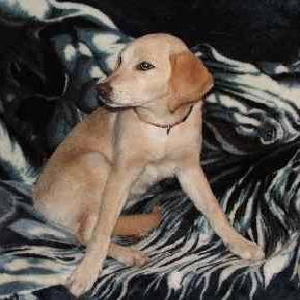

In [84]:
array_to_img(get_photo('data/test/199.jpg')[0])

In [103]:
model.predict(get_photo('data/train/dog.10.jpg'))[0][0]

1/1 [==============================] - 0s 24ms/step


0.9999999

In [217]:
np.shape(get_photo('data/train/dog.10.jpg'))

(1, 300, 300, 3)

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [104]:
model.evaluate(val_generator,verbose=1)

47/47 [==============================] - 45s 889ms/step - loss: 0.5693 - accuracy: 0.7179


[0.5693499445915222, 0.7179059386253357]

In [109]:
len(next(val_generator)[1])

64

In [110]:
next(val_generator)[1]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [112]:
len(next(val_generator)[0])

64

0
1


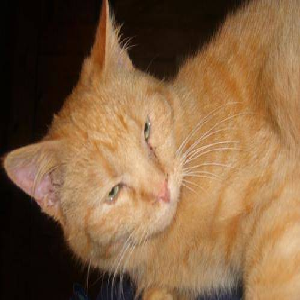

In [138]:
x = next(val_generator)
print(x[1][2])
print(x[1][0])
array_to_img(x[0][2])

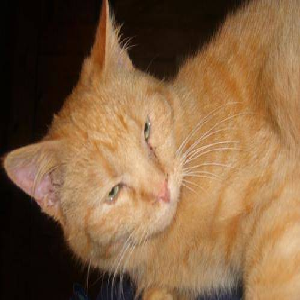

In [159]:
array_to_img(x[0][2])

In [187]:
n = model.predict(x[0])

2/2 [==============================] - 1s 460ms/step


[0.4691541]


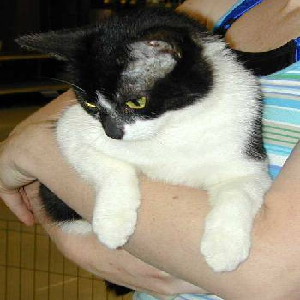

In [185]:
i = 20
print(n[i])
array_to_img(x[0][i])


In [225]:
test = []
test.append(x[0][0])
test = np.array(test)
np.shape(test)

(1, 300, 300, 3)

In [226]:
model.layers[0].input_shape

(None, 300, 300, 3)

In [227]:
model.predict(test)

1/1 [==============================] - 0s 24ms/step


array([[0.6676548]], dtype=float32)

In [251]:
model.predict(get_photo('data/test/27.jpg'))

1/1 [==============================] - 0s 25ms/step


array([[0.606534]], dtype=float32)

In [239]:
np.shape(get_photo('data/test/2.jpg'))

(1, 300, 300, 3)

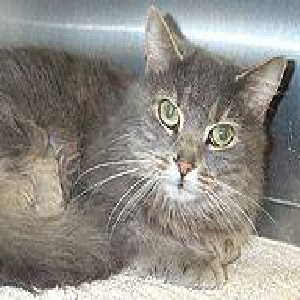

In [246]:
array_to_img(get_photo('data/test/7.jpg')[0])

NameError: name 'x' is not defined